In [7]:
!pip install yfinance

     ---------------------------------------- 69.0/69.0 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 14.2 MB/s eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 31.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 112.2/112.2 kB 6.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.0-py3-none-any.whl size=135766 sha256=77856aa86e8cf16c1ffff7582865d5e962fcf8485e86869aac8874aeacfd52f9
  Stored in directory: c:\users\piotr\appdata\local\pip\cache\wheels\c7\70\ad\212867e96e7004265a69c4aa5dcff00a95f547a67ba26e7e76
Successfully built peewee



[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: C:\Users\piotr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [28]:
#imports
import yfinance as yf
import sqlite3
import numpy as np
import pandas as pd
import matplotlib as mplt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
symbol = "AAPL"
data = yf.download(symbol, period="max")
conn = sqlite3.connect("danefinansowe.db")

data.to_sql(name=symbol, con=conn , if_exists="replace", index=True)
conn.close()


[*********************100%%**********************]  1 of 1 completed


In [20]:
conn = sqlite3.connect("danefinansowe.db")
query = f"SELECT * FROM AAPL"
df = pd.read_sql(query, conn)
conn.close()

df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12 00:00:00,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1,1980-12-15 00:00:00,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
2,1980-12-16 00:00:00,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
3,1980-12-17 00:00:00,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
4,1980-12-18 00:00:00,0.118862,0.119420,0.118862,0.118862,0.091978,73449600


In [22]:
df.shape

(10850, 7)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10850 entries, 1980-12-12 to 2023-12-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   10850 non-null  float64
dtypes: float64(1)
memory usage: 169.5 KB


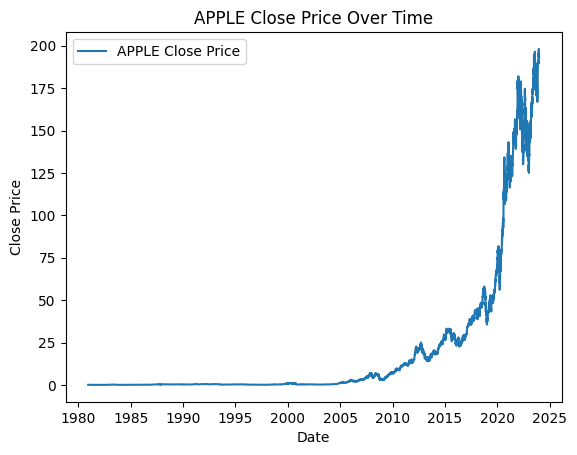

In [39]:
# Łączenie z bazą danych SQLite
conn = sqlite3.connect("danefinansowe.db")

# Pobieranie danych z bazy danych do DataFrame
symbol = "AAPL"
query = f"SELECT Date, Close FROM {symbol}"
df = pd.read_sql(query, conn)

# Zamknięcie połączenia z bazą danych
conn.close()

# Konwersja kolumny 'Date' do typu datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ustawienie kolumny 'Date' jako indeks
df.set_index('Date', inplace=True)

# Narysowanie wykresu
plt.plot(df.index, df['Close'], label=f'APPLE Close Price')
plt.title(f'APPLE Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [40]:
# dolaczanie kolumny do bazy danych
# Łączenie z bazą danych SQLite
conn = sqlite3.connect("danefinansowe.db")

# Pobieranie danych z bazy danych do DataFrame
symbol = "AAPL"
query = f"SELECT * FROM {symbol}"
df = pd.read_sql(query, conn)

# Zamknięcie połączenia z bazą danych
conn.close()

# Obliczenie kolumny "High-Low Returns"
df['High-Low Returns'] = (df['High'] - df['Low']) / df['Low']

# Ponowne połączenie z bazą danych SQLite
conn = sqlite3.connect("danefinansowe.db")

# Zapisywanie danych z DataFrame do istniejącej tabeli
df.to_sql(name=symbol, con=conn, if_exists="replace", index=True)

# Zamknięcie połączenia z bazą danych
conn.close()

In [50]:
# Łączenie z bazą danych SQLite
conn = sqlite3.connect("danefinansowe.db")

# Pobieranie danych z bazy danych do DataFrame
symbol = "AAPL"
query = f"SELECT * FROM {symbol}"
df = pd.read_sql(query, conn)

# Zamknięcie połączenia z bazą danych
conn.close()

# Obliczenie kolumny "C-C Returns"
df['C-C Returns'] = (df['Adj Close'] - df['Adj Close'].shift(-1)) / df['Adj Close'].shift(-1)

# Ponowne połączenie z bazą danych SQLite
conn = sqlite3.connect("danefinansowe.db")

# Zapisywanie danych z DataFrame do istniejącej tabeli
df.to_sql(name=symbol, con=conn, if_exists="replace", index=True)

# Zamknięcie połączenia z bazą danych
conn.close()

In [51]:
X = df['C-C Returns']
X.std()


0.029559065717114974